<h1><span style="color:green"> This is a Coursera Capstone Project for the IBM Professional Certificate of Data Science  </span></h1>

## The project name is: **The Battle of the Neighbourhoods**

### It consist in the analysis of some areas in Toronto (CA) in oder to find a place that has all the characteristic of the area were the "client" lives

<h3><span style="color:darkblue"> Here is a map of Toronto: </span></h3>

![Here is a Toronto map](https://www.toronto.ca/wp-content/uploads/2017/10/8f13-WellbeingToronto.png)

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
print("Hallo Capstone Project Course!")

Hallo Capstone Project Course!


## Retrieving Neighborhood data from the Wikipedia page

In [3]:
#Installing the bs4 to use BeautifulSoup method
!pip install bs4

In [4]:
from bs4 import BeautifulSoup
import requests

In [5]:
#Retrieving the table from the "List of postal codes of canada page"
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
data  = requests.get(url).text
soup = BeautifulSoup(data,"html5lib")
table_contents=[]
table = soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})
df

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto Business,Enclave of M4L
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [6]:
#checking that no null values are present
df.isnull().sum()

PostalCode      0
Borough         0
Neighborhood    0
dtype: int64

In [7]:
df.shape

(103, 3)

## Merging the Coordinates values for each Neighborhood to a new dataframe

In [8]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv'
df_coord = pd.read_csv(path)
new_df = merged_inner = pd.merge(left=df, right=df_coord, left_on='PostalCode', right_on='Postal Code')
new_df.drop('Postal Code', axis=1, inplace=True)
new_df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


In [9]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: ...working... done

# All requested packages already installed.



In [10]:
conda update -n base -c defaults conda

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\acer\anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1h             |       he774522_0         4.8 MB
    ------------------------------------------------------------
                                           Total:         4.8 MB

The following packages will be REMOVED:

  python_abi-3.8-1_cp38

The following packages will be UPDATED:

  backports.functoo~                             1.6.1-py_0 --> 1.6.4-pyhd3eb1b0_0
  conda              conda-forge::conda-4.10.1-py38haa244f~ --> pkgs/main::conda-4.10.1-py38haa95532_1
  conda-package-han~                   1.7.2-py38h76e460a_0 --> 1.7.3-py38h8cc25b3_1

The following packages will be SUPERSEDED by a higher-priority ch

In [11]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\acer\anaconda3

  added / updated specs:
    - geopy


The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.8-1_cp38

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-4.10.1-py38haa95532_1 --> conda-forge::conda-4.10.1-py38haa244fe_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


### Let's find out the coordinates of Toronto

In [12]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


### I am plotting all the neighborhoods that are present in New_df dataframe

In [13]:
latitude = 43.65
longitude = -79.38

map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough, neighborhood in zip(new_df['Latitude'], new_df['Longitude'], new_df['Borough'], new_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Let's get information about the nearby venues of each neighborhood

In [14]:
CLIENT_ID = 'TM1N0VWGQ3PXPB0UYBY00L24Y5FCBY5B5W2NB1BEBRLDO3UX' # your Foursquare ID
CLIENT_SECRET = 'RSTO2SNH4HEVVU2X1MTMF5KGUSEJ1VYPRP1XOSF5THNZETUG' # your Foursquare Secret
ACCESS_TOKEN = '05M24KSBSWPRV0VH4V24XFOVD1R5Z2R2LPCI1O1HQ3EIWEQQ' # your FourSquare Access Token
VERSION = '20210426' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
print('ACCESS_TOKEN:' + ACCESS_TOKEN)

Your credentails:
CLIENT_ID: TM1N0VWGQ3PXPB0UYBY00L24Y5FCBY5B5W2NB1BEBRLDO3UX
CLIENT_SECRET:RSTO2SNH4HEVVU2X1MTMF5KGUSEJ1VYPRP1XOSF5THNZETUG
ACCESS_TOKEN:05M24KSBSWPRV0VH4V24XFOVD1R5Z2R2LPCI1O1HQ3EIWEQQ


In [15]:
#I get the range of the iteraction from the dataframe shape (ie. number of rows)
r = new_df.shape[0]

i=0
radius=500
LIMIT=100
venues_list=[]
for i in range(0,r):
    
    #getting neighborhood informations and storing them in variables
    neighborhood_latitude = new_df.loc[i, 'Latitude'] 
    neighborhood_longitude = new_df.loc[i, 'Longitude'] 
    neighborhood_name = new_df.loc[i, 'Neighborhood'] 
    
    print(i,neighborhood_name)
    
    #url call for each neighborhood
    url_get = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude,ACCESS_TOKEN, VERSION, radius, LIMIT)
    
    #getting information from the json file for each request (ie.each neighborhood)
    results = requests.get(url_get).json()
    #for some index I get an error: index out of range which is hard to predict so I simply skip it wirth try: except:
    for x in range(0,LIMIT):
        try:
            venue_name = results["response"]['venues'][x]['name']
            venue_category = results["response"]['venues'][x]['categories'][0]['name']
            venue_latitude = results["response"]['venues'][x]['location']['lat']
            venue_longitude = results["response"]['venues'][x]['location']['lng']
       
            
            
      
    #creating a list containig useful informations about each venue  
            venues_list.append([(
                neighborhood_name, 
                neighborhood_latitude, 
                neighborhood_longitude, 
                venue_name, 
                venue_category, 
                venue_latitude,  
                venue_longitude)])
    
    #storing them in a pandas dataframe
            nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
            nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue',
                  'Venue Category',
                  'Venue Latitude', 
                  'Venue Longitude']
        except:
            x=x+1

    
i=i+1


0 Parkwoods
1 Victoria Village
2 Regent Park, Harbourfront
3 Lawrence Manor, Lawrence Heights
4 Ontario Provincial Government
5 Islington Avenue
6 Malvern, Rouge
7 Don Mills North
8 Parkview Hill, Woodbine Gardens
9 Garden District, Ryerson
10 Glencairn
11 West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
12 Rouge Hill, Port Union, Highland Creek
13 Don Mills South
14 Woodbine Heights
15 St. James Town
16 Humewood-Cedarvale
17 Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
18 Guildwood, Morningside, West Hill
19 The Beaches
20 Berczy Park
21 Caledonia-Fairbanks
22 Woburn
23 Leaside
24 Central Bay Street
25 Christie
26 Cedarbrae
27 Hillcrest Village
28 Bathurst Manor, Wilson Heights, Downsview North
29 Thorncliffe Park
30 Richmond, Adelaide, King
31 Dufferin, Dovercourt Village
32 Scarborough Village
33 Fairview, Henry Farm, Oriole
34 Northwood Park, York University
35 The Danforth  East
36 Harbourfront East, Union Station, Toronto Islands
37 Little P

In [16]:
nearby_venues.isnull().sum()  #checking if there is any null value

Neighborhood              0
Neighborhood Latitude     0
Neighborhood Longitude    0
Venue                     0
Venue Category            0
Venue Latitude            0
Venue Longitude           0
dtype: int64

In [17]:
nearby_venues.shape #Checking the dimension of the dataframe

(8802, 7)

In [18]:
nearby_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Venue Latitude,Venue Longitude
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,Park,43.751976,-79.332140
1,Parkwoods,43.753259,-79.329656,17 Brookbanks Drive,Residential Building (Apartment / Condo),43.752266,-79.332322
2,Parkwoods,43.753259,-79.329656,Tailor Made,Laundry Service,43.741513,-79.319707
3,Parkwoods,43.753259,-79.329656,Allwyn's Bakery,Caribbean Restaurant,43.759840,-79.324719
4,Parkwoods,43.753259,-79.329656,Allwynn's Bakery,Bakery,43.746020,-79.324715
...,...,...,...,...,...,...,...
8797,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Goodwill,Thrift / Vintage Store,43.624229,-79.520047
8798,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Koala Tan Tanning Salon & Sunless Spa,Tanning Salon,43.631370,-79.519006
8799,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Kingsway Boxing Club,Gym,43.627254,-79.526684
8800,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Viryl Technologies,Record Shop,43.627911,-79.526154


## Analysis of each Venue Category per each Neighborhood

In [19]:
# one hot encoding
toronto_onehot = pd.get_dummies(nearby_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = nearby_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighborhood,ATM,Accessories Store,Acupuncturist,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,...,Waste Facility,Watch Shop,Water Park,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
toronto_onehot.shape

(8802, 510)

## Getting the mean value for the frequency of each venue category for each neighborhood

In [21]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,ATM,Accessories Store,Acupuncturist,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,...,Waste Facility,Watch Shop,Water Park,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,Agincourt,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.011111,0.0
3,Bayview Village,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.011111,0.0,0.011111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,"Willowdale, Newtonbrook",0.0,0.0,0.011111,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.011111,0.000000,0.000000,0.0,0.000000,0.0
99,Woburn,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
100,Woodbine Heights,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
101,York Mills West,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.011494,0.000000,0.0,0.011494,0.0


## Defining the most common venues for each Neighborhood

In [22]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [23]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Agincourt,Automotive Shop,Building,Church,Office,Post Office
1,"Alderwood, Long Branch",Office,Dentist's Office,Bank,Pub,Convenience Store
2,"Bathurst Manor, Wilson Heights, Downsview North",Doctor's Office,Residential Building (Apartment / Condo),Medical Center,Office,Synagogue
3,Bayview Village,Residential Building (Apartment / Condo),Church,Doctor's Office,Salon / Barbershop,Office
4,"Bedford Park, Lawrence Manor East",Salon / Barbershop,Italian Restaurant,Sushi Restaurant,Spa,Restaurant


## Clustering the data 

In [24]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [25]:
# set number of clusters
kclusters = 4

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 0, 0, 3, 1, 0, 2, 3, 0])

In [26]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = new_df

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,0,Residential Building (Apartment / Condo),Bus Stop,Park,Office,School
1,M4A,North York,Victoria Village,43.725882,-79.315572,2,Residential Building (Apartment / Condo),Automotive Shop,Bus Stop,Bank,Building
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,Office,Automotive Shop,Furniture / Home Store,Italian Restaurant,Food Truck
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,3,Clothing Store,Furniture / Home Store,Office,Design Studio,Miscellaneous Shop
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,3,Government Building,Medical Center,Building,Office,Capitol Building


### Four Clusters are giving a fairly equal division between blocks 

In [27]:
toronto_merged.groupby('Cluster Labels').count()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
Cluster Labels,,,,,,,,,,
0,39,39,39,39,39,39,39,39,39,39
1,11,11,11,11,11,11,11,11,11,11
2,11,11,11,11,11,11,11,11,11,11
3,42,42,42,42,42,42,42,42,42,42


## Plotting the neighborhoods classified by Cluster Number

In [42]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Analysis of the charachteristic of each cluster

In [29]:
#toronto_grouped.insert(0, 'Cluster Labels', kmeans.labels_)
Cluster_analysis = toronto_grouped
Cluster_analysis.insert(0, 'Cluster Labels', kmeans.labels_)
Cluster_analysis.index = toronto_grouped['Neighborhood']
Cluster_analysis.drop('Neighborhood', axis=1, inplace=True)
Cluster_analysis = Cluster_analysis.groupby('Cluster Labels').mean().reset_index().transpose()
Cluster_analysis.drop('Cluster Labels', axis=0, inplace=True)

In [30]:
Cluster_analysis.rename(columns = {0:'Cluster 0',1:'Cluster 1',2:'Cluster 2', 3:'Cluster 3'}, inplace=True)

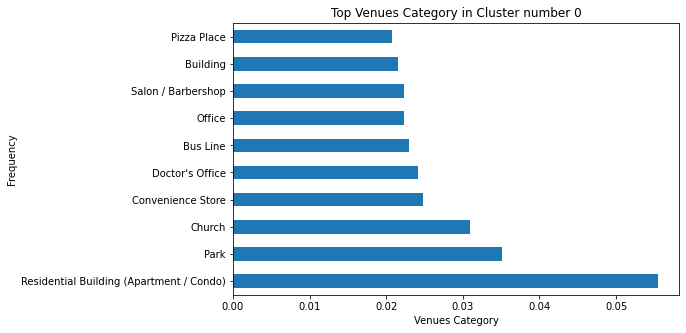

In [38]:
Clust_0 = Cluster_analysis['Cluster 0'].sort_values(ascending=False).head(10)
Clust_0.plot(kind='barh', figsize=(8, 5))

plt.title('Top Venues Category in Cluster number 0') # add a title to the histogram
plt.ylabel('Frequency') # add y-label
plt.xlabel('Venues Category') # add x-label

plt.show()

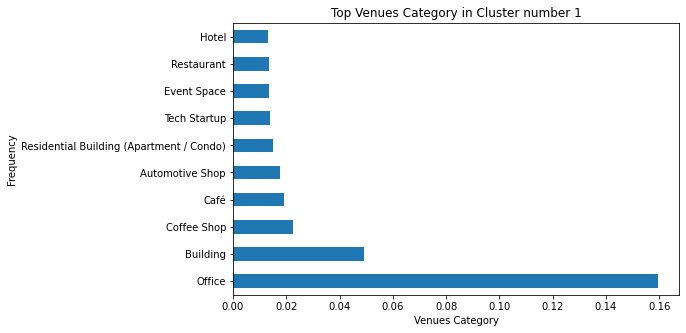

In [39]:
Clust_1 = Cluster_analysis['Cluster 1'].sort_values(ascending=False).head(10)
Clust_1.plot(kind='barh', figsize=(8, 5))

plt.title('Top Venues Category in Cluster number 1') # add a title to the histogram
plt.ylabel('Frequency') # add y-label
plt.xlabel('Venues Category') # add x-label

plt.show()

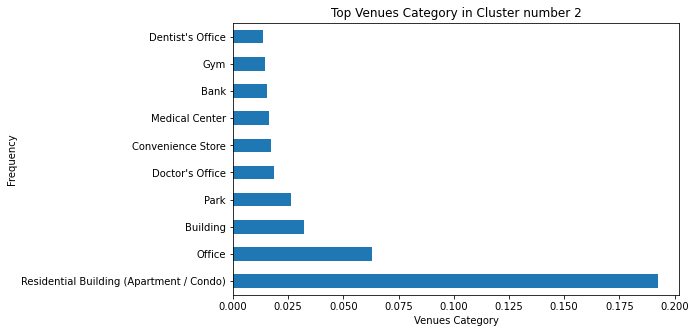

In [40]:
Clust_2 = Cluster_analysis['Cluster 2'].sort_values(ascending=False).head(10)
Clust_2.plot(kind='barh', figsize=(8, 5))

plt.title('Top Venues Category in Cluster number 2') # add a title to the histogram
plt.ylabel('Frequency') # add y-label
plt.xlabel('Venues Category') # add x-label

plt.show()

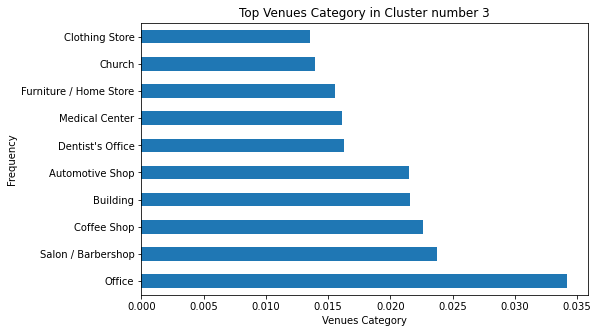

In [41]:
Clust_3 = Cluster_analysis['Cluster 3'].sort_values(ascending=False).head(10)
Clust_3.plot(kind='barh', figsize=(8, 5))

plt.title('Top Venues Category in Cluster number 3') # add a title to the histogram
plt.ylabel('Frequency') # add y-label
plt.xlabel('Venues Category') # add x-label

plt.show()

## Clusters 0 and 3 seems residential and probably very nice to live in. Clusters 1 and 2 seems more like a business area. 